In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import linear_model

In [25]:
df=pd.read_csv('/content/KL_Real_Estate_dataclean.csv')

In [29]:
df1=df.copy()

In [30]:
df.drop(columns=['Roomsold', 'Servant room', 'SizeOld', 'Mult','Sizeig', 'multa','acre'], inplace=True)


In [31]:
df2=df.copy()

In [34]:
df.head(10)

,Location,Price,Rooms,Car Parks,Property Type,Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,3,2.0,Serviced Residence,Built-up,1335,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,NaN,Bungalow,Land area,6900,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,2.0,Condominium (Corner),Built-up,1875,Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,0,NaN,NaN,NaN,0,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,5,2.0,Condominium (Corner),Built-up,1513,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,6,4.0,Bungalow,Land area,7200,Partly Furnished
6,"Seputeh, Kuala Lumpur",NaN,0,NaN,NaN,NaN,0,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4.0,Semi-detached House,Land area,3600,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000.0,5,3.0,2-sty Terrace/Link House (EndLot),Land area,1875,Partly Furnished
9,"Sri Petaling, Kuala Lumpur",385000.0,3,1.0,Apartment (Intermediate),Built-up,904,Partly Furnished


In [28]:
df.columns

Index(['Location', 'Price', 'Roomsold', 'Servant room', 'Rooms', 'Car Parks',
       'Property Type', 'Type', 'SizeOld', 'Mult', 'Size', 'Sizeig', 'multa',
       'acre', 'Furnishing'],
      dtype='object')

In [33]:
df.isna().sum()

Location             0
Price              248
Rooms                0
Car Parks        17567
Property Type       25
Type              1063
Size                 0
Furnishing        6930
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49198 entries, 0 to 49197
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                49198 non-null  int64 
 1   Bathrooms            49198 non-null  int64 
 2   Car Parks            49198 non-null  int64 
 3   Property Type        49198 non-null  object
 4   Furnishing           49198 non-null  object
 5   area                 49198 non-null  object
 6   No_of_Bedrooms       49198 non-null  object
 7   No_of_servant_rooms  49198 non-null  int64 
 8   type                 42615 non-null  object
 9   size                 49198 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


In [39]:
df.fillna(value={'Car Parks':0}, inplace=True)

In [38]:
df.isna().sum()

Location            0
Price             248
Rooms               0
Car Parks           0
Property Type      25
Type             1063
Size                0
Furnishing       6930
dtype: int64

In [40]:
df.fillna(value={'Type':'Unknown'}, inplace=True)

In [41]:
df.isna().sum()

Location            0
Price             248
Rooms               0
Car Parks           0
Property Type      25
Type                0
Size                0
Furnishing       6930
dtype: int64

In [42]:
df.fillna(value={'Furnishing':'Unknown'}, inplace=True)

In [43]:
df.isna().sum()

Location           0
Price            248
Rooms              0
Car Parks          0
Property Type     25
Type               0
Size               0
Furnishing         0
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.isna().sum()

Location         0
Price            0
Rooms            0
Car Parks        0
Property Type    0
Type             0
Size             0
Furnishing       0
dtype: int64

In [52]:
df.head(10)

,Location,Price,Rooms,Car Parks,Property Type,Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,3,2.0,Serviced Residence,Built-up,1335,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,0.0,Bungalow,Land area,6900,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,2.0,Condominium (Corner),Built-up,1875,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,5,2.0,Condominium (Corner),Built-up,1513,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,6,4.0,Bungalow,Land area,7200,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4.0,Semi-detached House,Land area,3600,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000.0,5,3.0,2-sty Terrace/Link House (EndLot),Land area,1875,Partly Furnished
9,"Sri Petaling, Kuala Lumpur",385000.0,3,1.0,Apartment (Intermediate),Built-up,904,Partly Furnished
11,"Taman Tun Dr Ismail, Kuala Lumpur",1680000.0,4,0.0,2-sty Terrace/Link House (Intermediate),Land area,1760,Partly Furnished
12,"Taman Tun Dr Ismail, Kuala Lumpur",1700000.0,4,0.0,2-sty Terrace/Link House (Intermediate),Land area,1900,Partly Furnished


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53635 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53635 non-null  object 
 1   Price          53635 non-null  float64
 2   Rooms          53635 non-null  int64  
 3   Car Parks      53635 non-null  float64
 4   Property Type  53635 non-null  object 
 5   Type           53635 non-null  object 
 6   Size           53635 non-null  object 
 7   Furnishing     53635 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


In [54]:
df['Size'] = df['Size'].replace(' Kuala Lumpur',0)

In [57]:
df['Size'] = df['Size'].replace(' Malaysia',1)

In [58]:
df['Size'] = df['Size'].astype(float)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53635 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53635 non-null  object 
 1   Price          53635 non-null  float64
 2   Rooms          53635 non-null  int64  
 3   Car Parks      53635 non-null  float64
 4   Property Type  53635 non-null  object 
 5   Type           53635 non-null  object 
 6   Size           53635 non-null  float64
 7   Furnishing     53635 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.7+ MB


In [60]:
df['Size']=df['Size'].replace(0,df['Size'].mean())

In [61]:
df['Size']=df['Size'].replace(1,df['Size'].mean())

Rooms: 0.5628
Car Parks: 0.3330
Property Type: 0.5514
Size: 1.4426
Furnishing: 0.2320


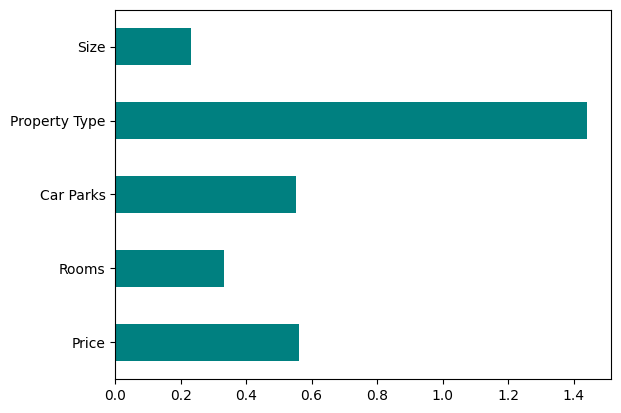

In [63]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df.head(10)

# Encode categorical variables with LabelEncoder
encoder = LabelEncoder()
df['Property Type'] = encoder.fit_transform(df['Property Type'])
df['Furnishing'] = encoder.fit_transform(df['Furnishing'])


# Drop non-numeric columns
df.drop(columns=['Location', 'Type'], inplace=True)



# features (X) and target variable (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Print feature importance scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")


feat_importances = pd.Series(mi_scores, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [64]:
import sklearn
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
x=df.corr()
x

,Price,Rooms,Car Parks,Property Type,Size,Furnishing
Price,1.000000,0.041052,0.026500,0.000628,0.096536,0.037298
Rooms,0.041052,1.000000,0.315114,-0.339135,0.000077,0.001061
Car Parks,0.026500,0.315114,1.000000,-0.042439,-0.001436,-0.055287
Property Type,0.000628,-0.339135,-0.042439,1.000000,-0.001321,-0.144028
Size,0.096536,0.000077,-0.001436,-0.001321,1.000000,0.034194
Furnishing,0.037298,0.001061,-0.055287,-0.144028,0.034194,1.000000


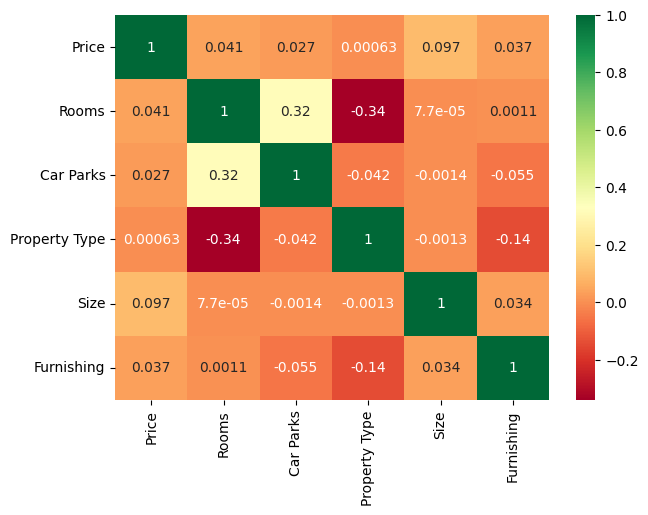

In [81]:
plt.subplots(figsize=(7,5))
sns.heatmap(x, cmap='RdYlGn', annot=True)
plt.show()

In [89]:
x=df.drop('Price', axis=1)

In [90]:
y=df['Price']

In [79]:
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.25, random_state=1)

In [72]:
df.shape

(53635, 6)

In [78]:
y.shape

(53635,)

In [77]:
x.shape

(53635, 5)

In [82]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm

LinearRegression()

In [83]:
#Fit

lm.fit(train_x, train_y)

LinearRegression()

In [84]:
#Predict

predict_test=lm.predict(test_x)
predict_test

array([1728432.63315562, 1562106.74250636,  951798.82732798, ...,
       4132240.26359021, 1611840.22451125, 1386970.1647018 ])

In [85]:
print(lm.coef_)

[3.59149517e+05 9.04879735e+04 1.26381483e+04 2.12627813e+01
 5.32655459e+05]


In [92]:
x.columns.size

5

In [91]:
x

,Rooms,Car Parks,Property Type,Size,Furnishing
0,3,2.0,84,1335.0,0
1,6,0.0,46,6900.0,1
2,3,2.0,60,1875.0,1
4,5,2.0,60,1513.0,1
5,6,4.0,46,7200.0,1
...,...,...,...,...,...
53878,6,0.0,47,7168.0,0
53879,5,0.0,50,15000.0,2
53880,6,0.0,50,7168.0,1
53881,3,0.0,63,1150.0,2


In [94]:
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})

In [95]:
df_m=df_m.sort_values(by=['coeff'])
df_m

,features,coeff
3,Size,21.262781
2,Property Type,12638.148305
1,Car Parks,90487.973481
0,Rooms,359149.517326
4,Furnishing,532655.459426


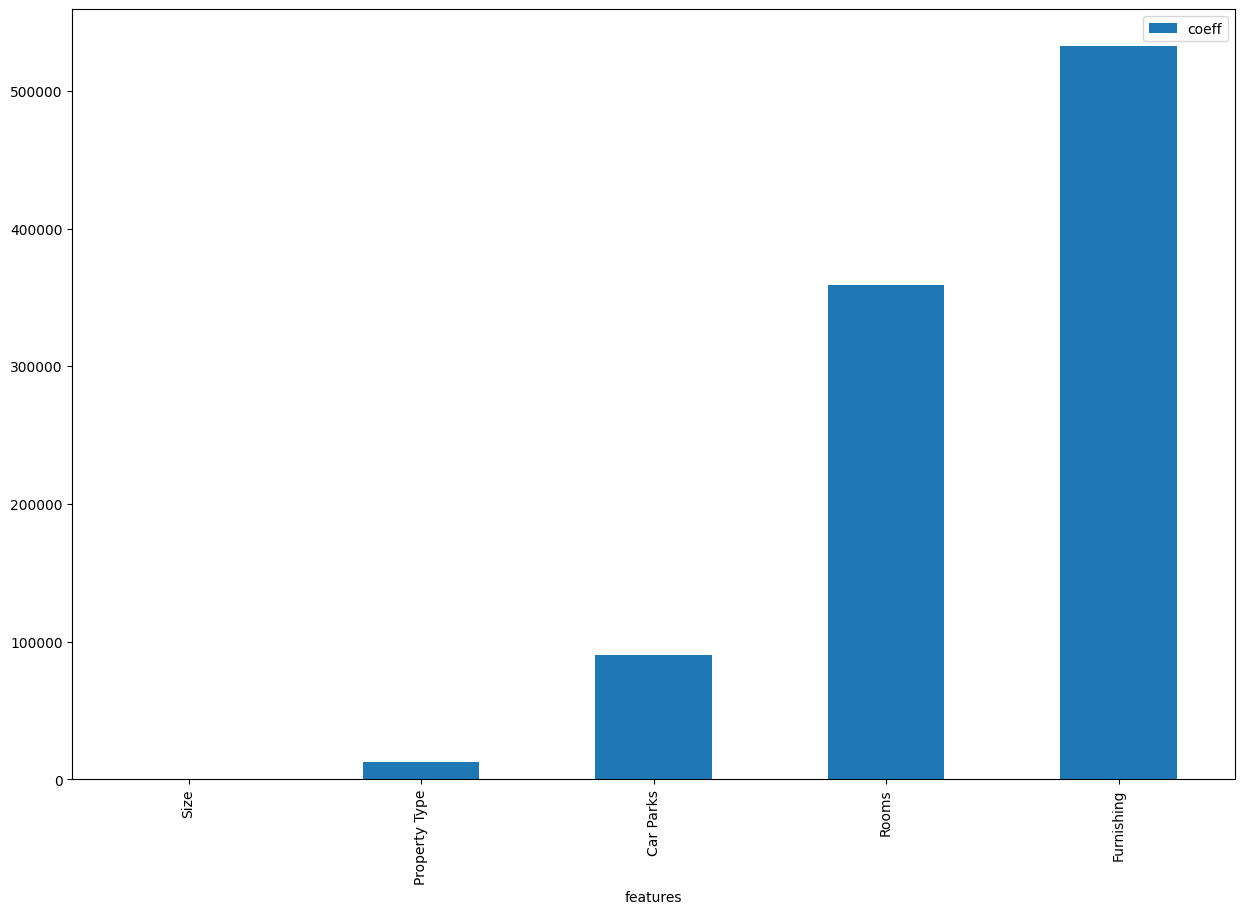

In [96]:
df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
plt.show()

In [97]:
("RSquare Value for TEST data is -")
np.round(lm.score(test_x, test_y)*100, 0)

("RSquare Value for TRAIN data is -")
np.round(lm.score(train_x, train_y)*100, 0)

1.0

In [98]:
import numpy as np
from sklearn import metrics
print("MSE for Test data is")
np.round(metrics.mean_squared_error(test_y, predict_test), 0)

MSE for Test data is


114853091095620.0

In [99]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error for test data is")
np.round(metrics.mean_absolute_error(test_y, predict_test), 0)

Mean Absolute Error for test data is


1627820.0

In [101]:
fdf = pd.concat([test_x, test_y], 1)
fdf['Predicted']= np.round(predict_test, 1)
fdf['Prediction_error'] = fdf['Price']-fdf['Predicted']
fdf

<ipython-input-101-fb477e8e2f41>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  fdf = pd.concat([test_x, test_y], 1)


,Rooms,Car Parks,Property Type,Size,Furnishing,Price,Predicted,Prediction_error
37993,4,2.0,63,1658.0,0,1280000.0,1728432.6,-448432.6
4377,4,0.0,63,2347.0,0,1750000.0,1562106.7,187893.3
3475,2,2.0,59,1292.0,0,1400000.0,951798.8,448201.2
11955,4,2.0,96,3358.0,1,2500000.0,2714293.7,-214293.7
5950,3,1.0,59,920.0,3,430000.0,2810517.0,-2380517.0
...,...,...,...,...,...,...,...,...
42424,3,2.0,59,1186.0,1,800000.0,1841349.9,-1041349.9
36411,3,1.0,59,800.0,2,300000.0,2275310.0,-1975310.0
21510,7,0.0,46,7500.0,3,11900000.0,4132240.3,7767759.7
25570,5,2.0,25,1870.0,0,2900000.0,1611840.2,1288159.8


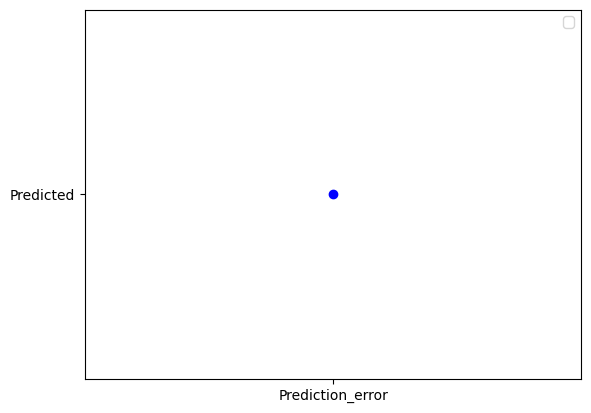

In [102]:
plt.scatter('Prediction_error', 'Predicted', c ="blue")

plt.legend()

# To show the plot
plt.show()